## Case study: new insights on poverty

In [2]:
library(tidyverse)
library(dslabs)
data(gapminder)


In [3]:
gapminder %>% as_tibble() %>% head

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


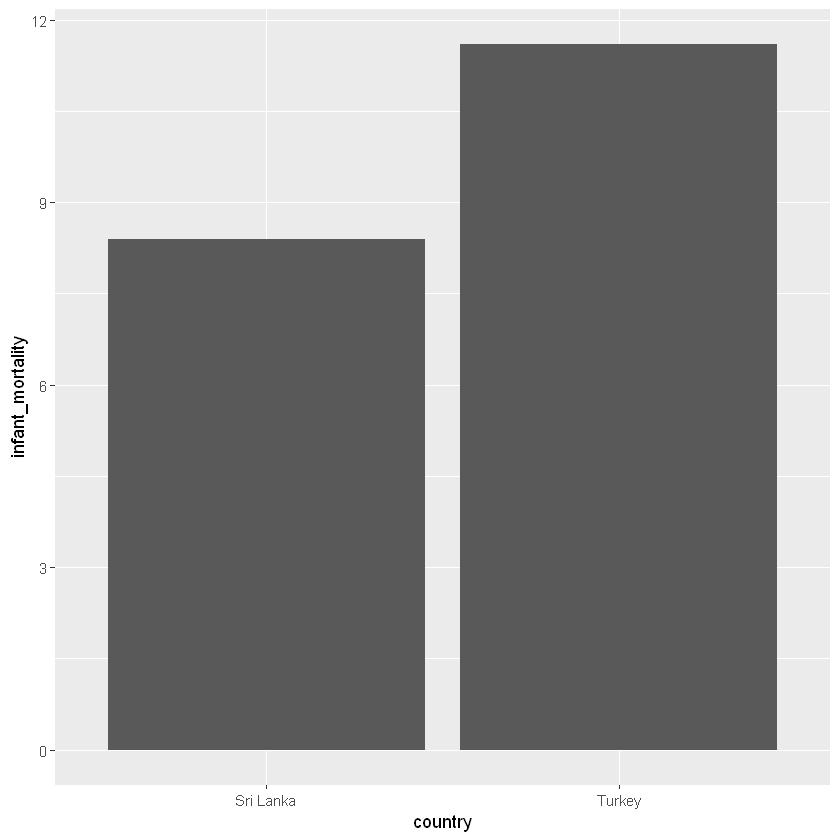

In [13]:
#child mortality rate
gapminder %>% 
  filter(year == 2015 & country %in% c("Sri Lanka","Turkey")) %>% 
  select(country, infant_mortality) %>% ggplot() + geom_col(aes(x = country, y = infant_mortality))

In [14]:
# scatterplot of life expectancy versus fertility rates

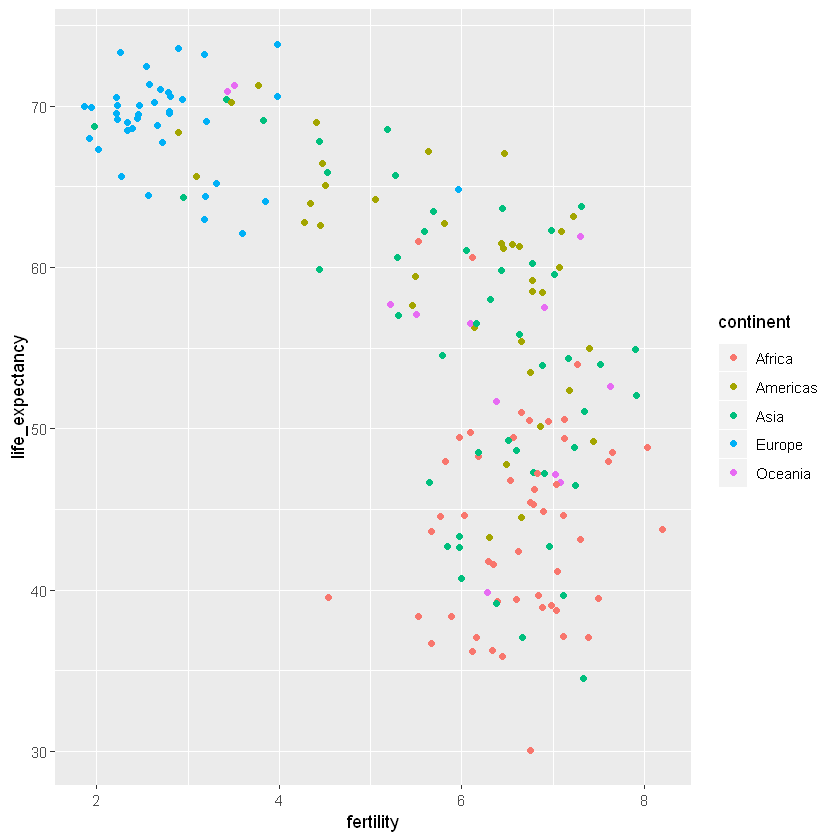

In [16]:
filter(gapminder, year == 1962) %>%
  ggplot( aes(fertility, life_expectancy, color = continent)) +
  geom_point() 

In [19]:
# how about after 50 years, 1962 was too old
# we will use Facets
# This function lets you facet by up to two variables using columns to represent one variable and rows to represent the other

# Faceting

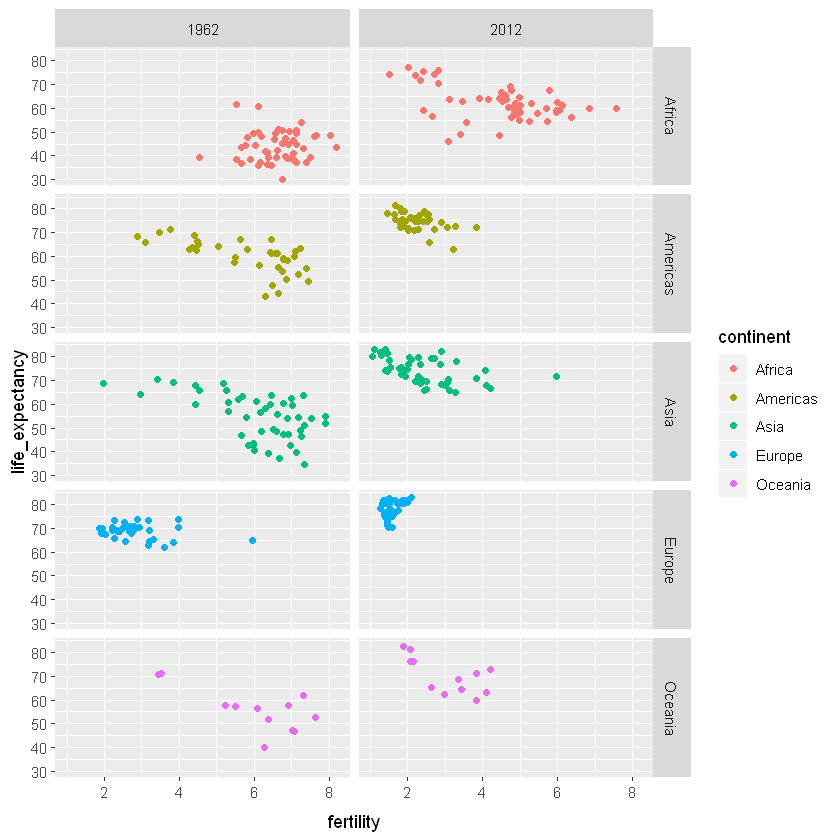

In [18]:
filter(gapminder, year%in%c(1962, 2012)) %>%
  ggplot(aes(fertility, life_expectancy, col = continent)) +
  geom_point() +
  facet_grid(continent~year)

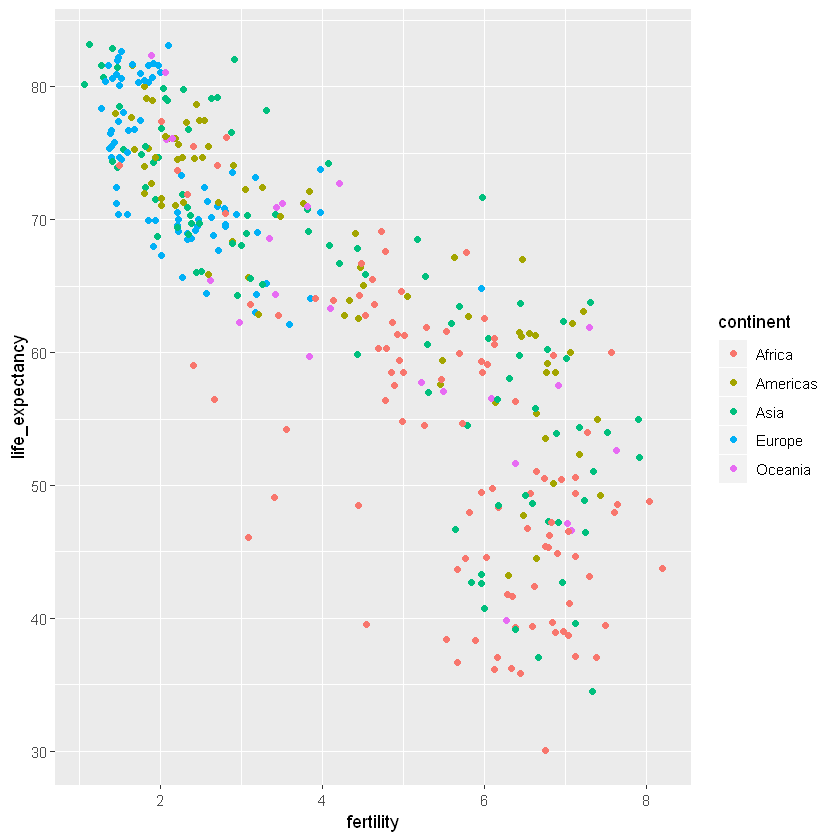

In [20]:
filter(gapminder, year%in%c(1962, 2012)) %>%
  ggplot(aes(fertility, life_expectancy, col = continent)) +
  geom_point()

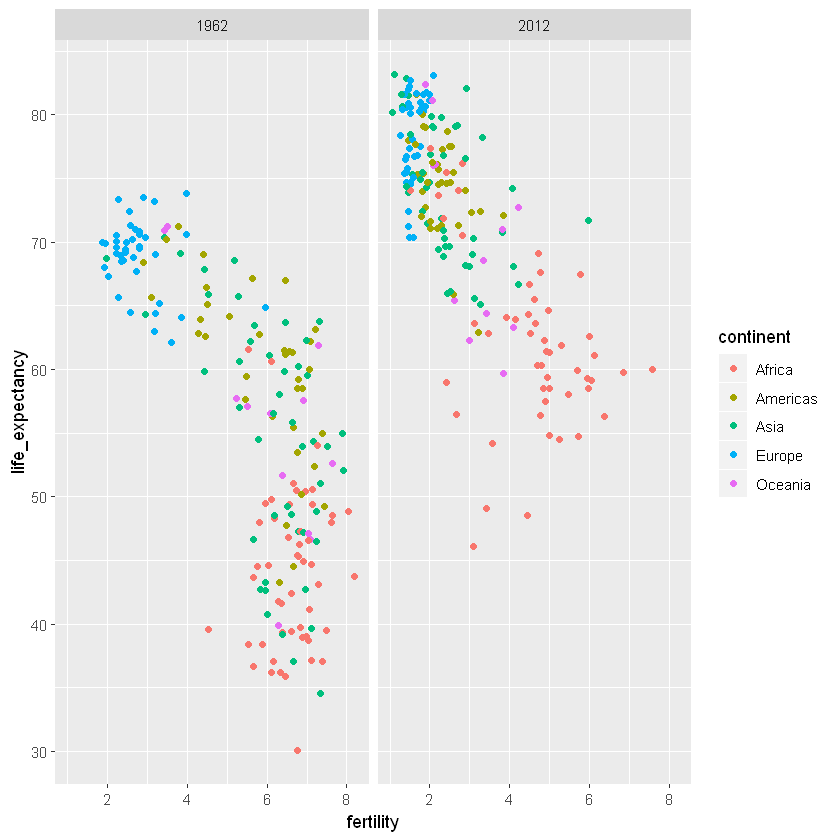

In [22]:
filter(gapminder, year%in%c(1962, 2012)) %>%
  ggplot(aes(fertility, life_expectancy, col = continent)) +
  geom_point() +
  facet_grid(. ~ year) # . for stating that one variable not used

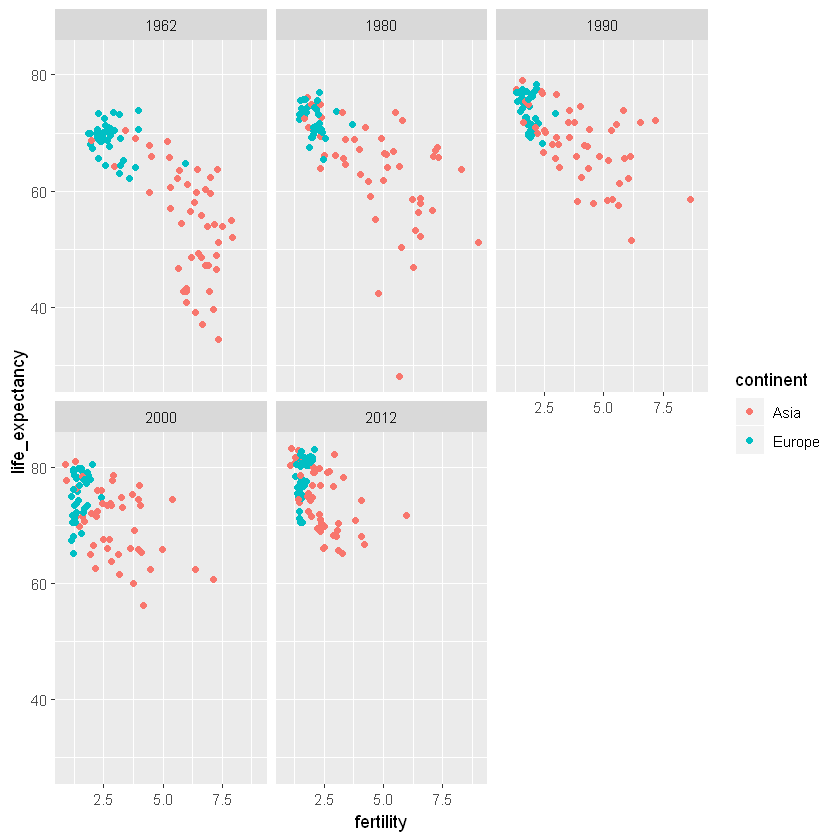

In [23]:
# i think facet-wrap is flexible and better over facet_grid
years <- c(1962, 1980, 1990, 2000, 2012)
continents <- c("Europe", "Asia")
gapminder %>% 
  filter(year %in% years & continent %in% continents) %>%
  ggplot( aes(fertility, life_expectancy, col = continent)) +
  geom_point() +
  facet_wrap(~year) 

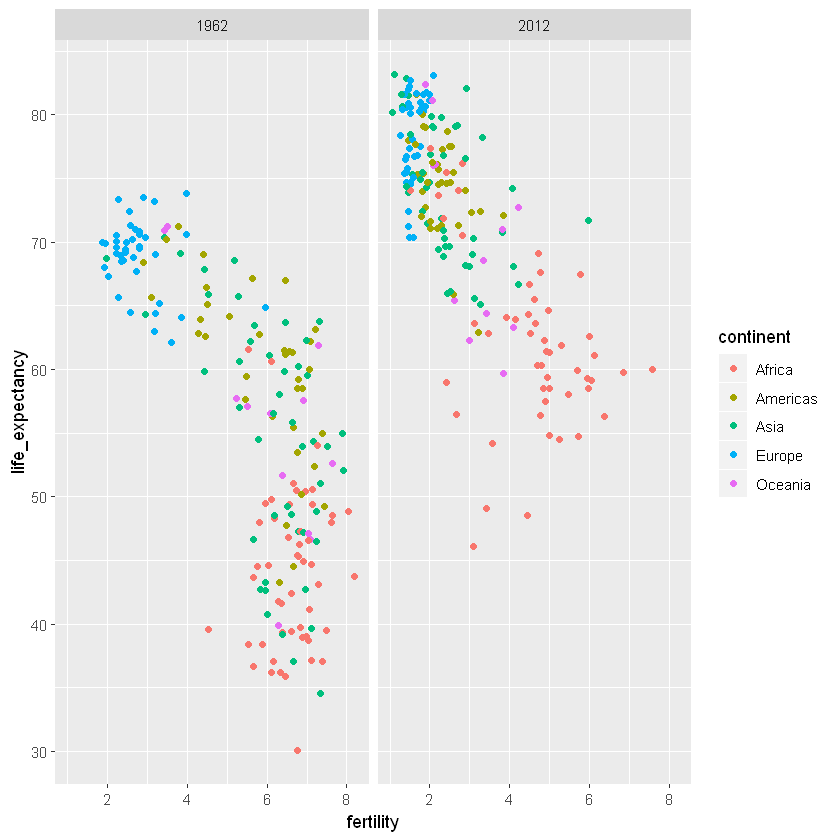

In [25]:
# fixing scales for all graphs
filter(gapminder, year%in%c(1962, 2012)) %>%
  ggplot(aes(fertility, life_expectancy, col = continent)) +
  geom_point() +
  facet_wrap(. ~ year, scales = "fixed")

## Time-series plots

Warning message:
"Removed 1 rows containing missing values (geom_point)."

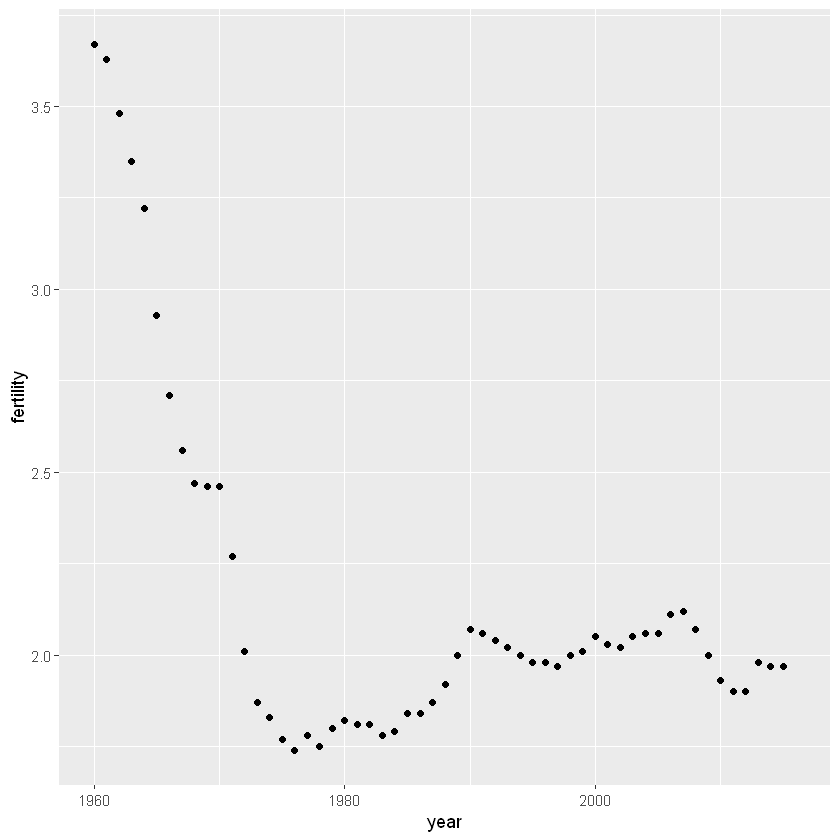

In [26]:
# trend of US fertility rates
gapminder %>% 
  filter(country == "United States") %>% 
  ggplot(aes(year, fertility)) +
  geom_point()

Warning message:
"Removed 1 rows containing missing values (geom_path)."

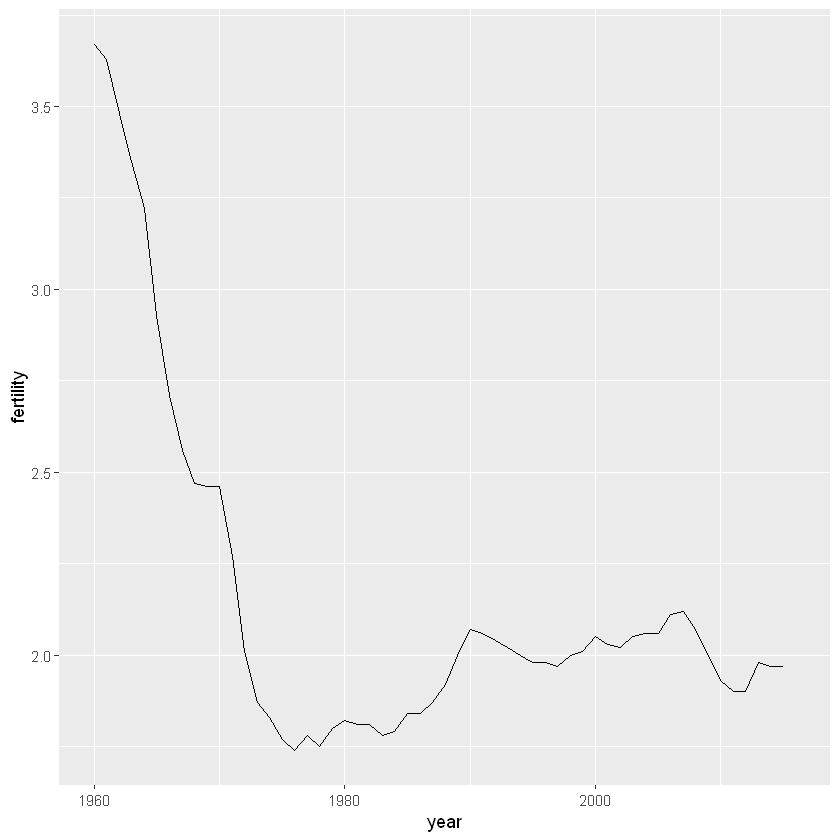

In [28]:
# replacing with geom_line to create curve
gapminder %>% 
  filter(country == "United States") %>% 
  ggplot(aes(year, fertility)) +
  geom_line()

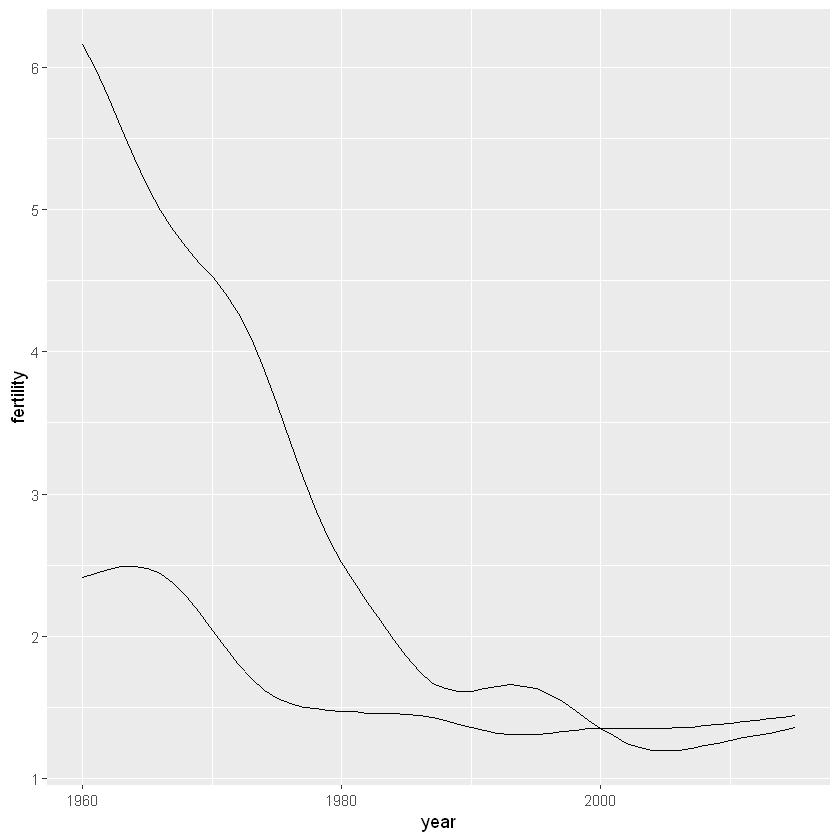

In [29]:
# multiple curves, use groups or color
countries <- c("South Korea","Germany")

gapminder %>% filter(country %in% countries & !is.na(fertility)) %>% 
  ggplot(aes(year, fertility, group = country)) +
  geom_line()

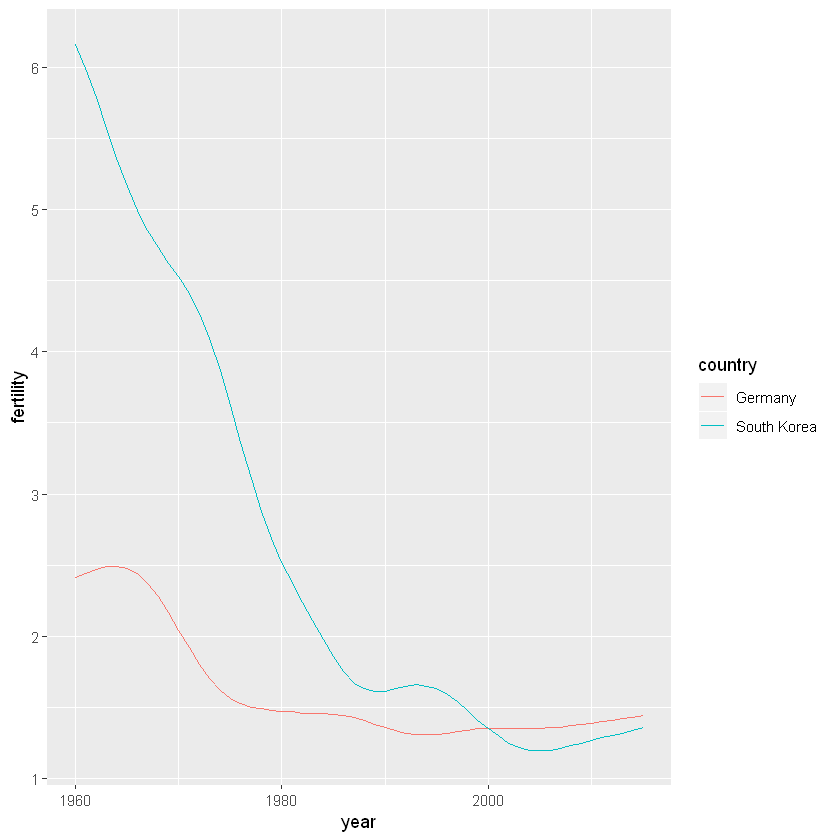

In [32]:
gapminder %>% filter(country %in% countries & !is.na(fertility)) %>% 
  ggplot(aes(year, fertility, color = country)) + # col, or colour, color
  geom_line()

**for trend plot it is better to label the line over having a legend**
`This suggestion actually applies to most plots: labeling is usually preferred over legends`

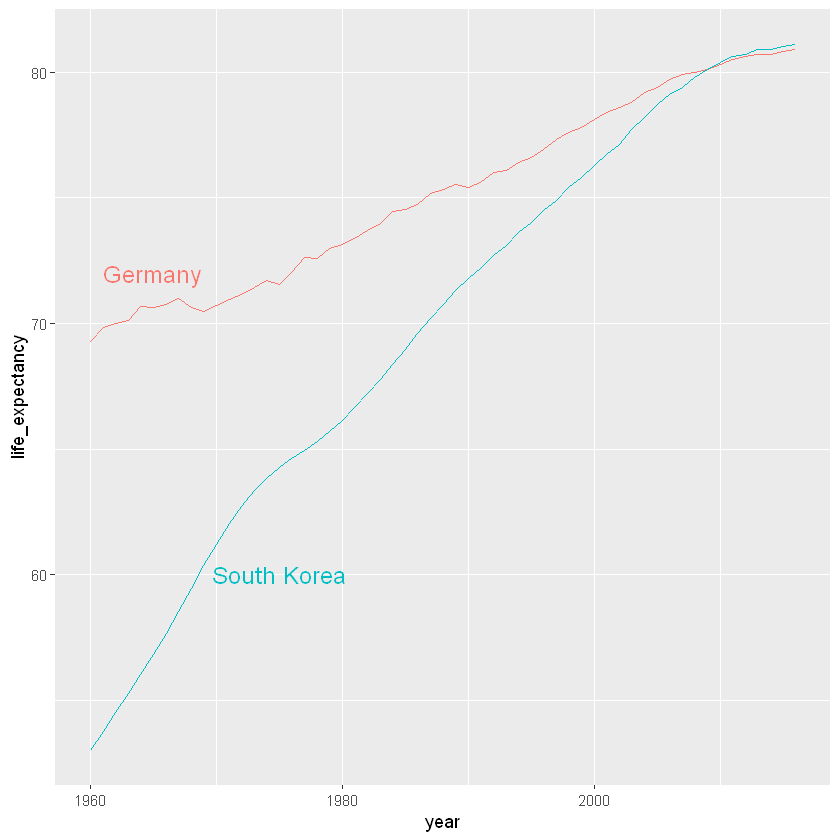

In [33]:
labels <- data.frame(country = countries, x = c(1975,1965), y = c(60,72))

gapminder %>% 
  filter(country %in% countries) %>% 
  ggplot(aes(year, life_expectancy, col = country)) +
  geom_line() +
  geom_text(data = labels, aes(x, y, label = country), size = 5) +
  theme(legend.position = "none")

### Data transformation

In [34]:
gapminder <- gapminder %>%  mutate(dollars_per_day = gdp/population/365) # earning of dollars per day



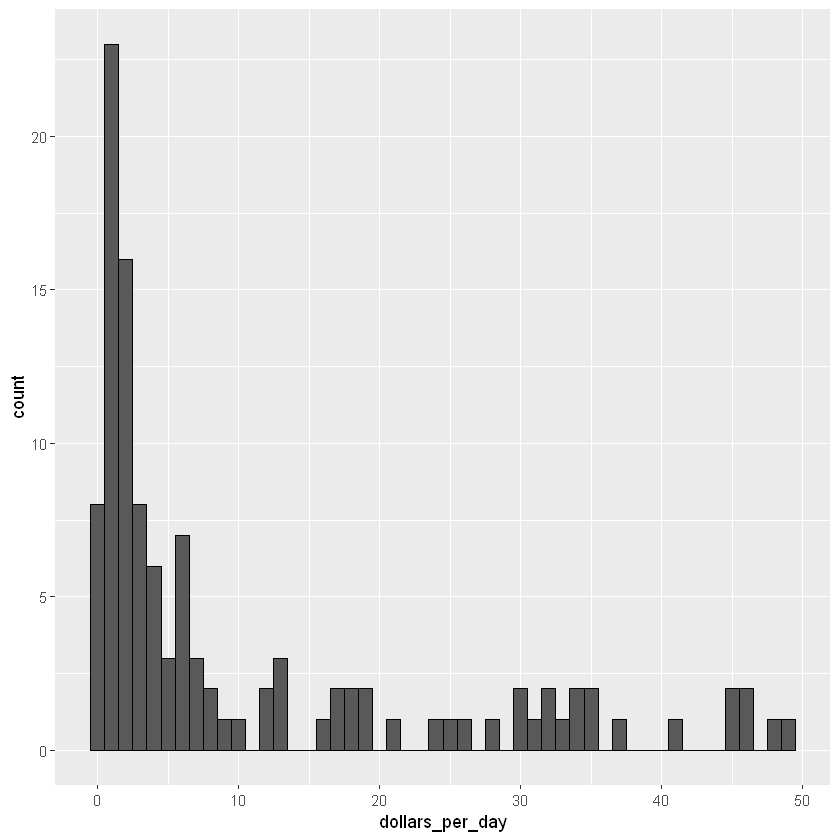

In [35]:
past_year <- 1970
gapminder %>% 
  filter(year == past_year & !is.na(gdp)) %>% # dropping countries with gdp NA
  ggplot(aes(dollars_per_day)) + 
  geom_histogram(binwidth = 1, color = "black")

In [37]:
#the plot is not very informative about countries with values below $10 a day

In [38]:
# t might be more informative to quickly be able to see how many countries have average daily incomes of about
# $1 (extremely poor), $2 (very poor), $4 (poor), $8 (middle), $16 (well off), $32 (rich), $64 (very rich) per day

In [39]:
# These changes are multiplicative and log transformations convert multiplicative changes into additive ones: 
# when using base 2, a doubling of a value turns into an increase by 1

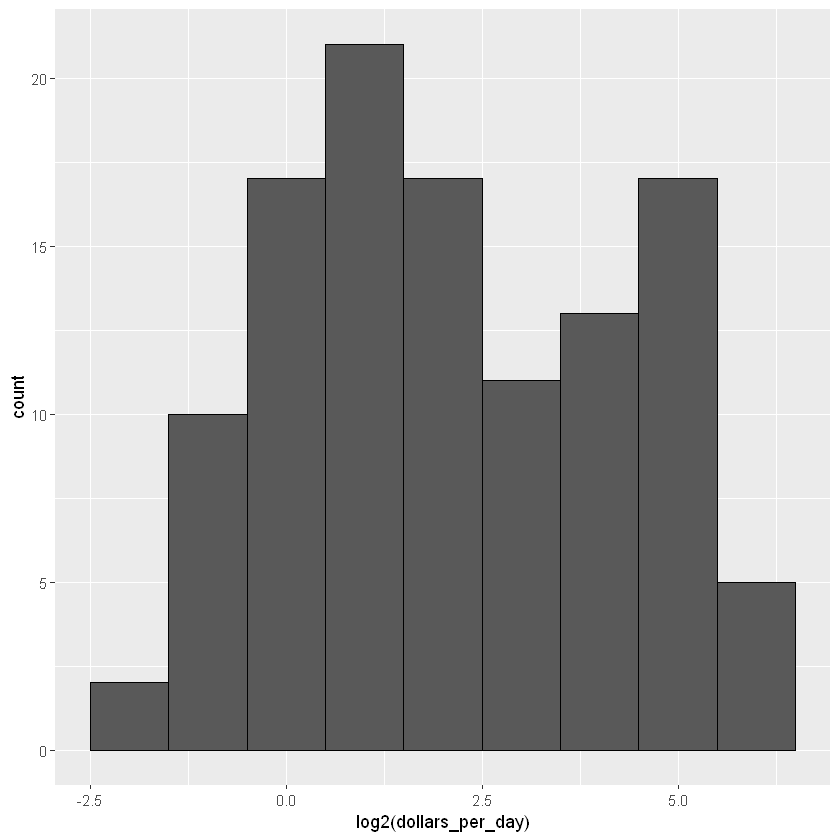

In [40]:
# using log2
gapminder %>% 
  filter(year == past_year & !is.na(gdp)) %>%
  ggplot(aes(log2(dollars_per_day))) + 
  geom_histogram(binwidth = 1, color = "black")

In [41]:
# Another consequence of a limited range is that choosing the binwidth is more challenging. 
# With log base 2, we know that a binwidth of 1 will translate to a bin with range  x  to 2x

In [42]:
# or an example in which base 10 makes more sense, consider population sizes. A log base 10 is preferable since the range for these is:


filter(gapminder, year == past_year) %>%
  summarize(min = min(population), max = max(population))

min,max
<dbl>,<dbl>
46075,808510713


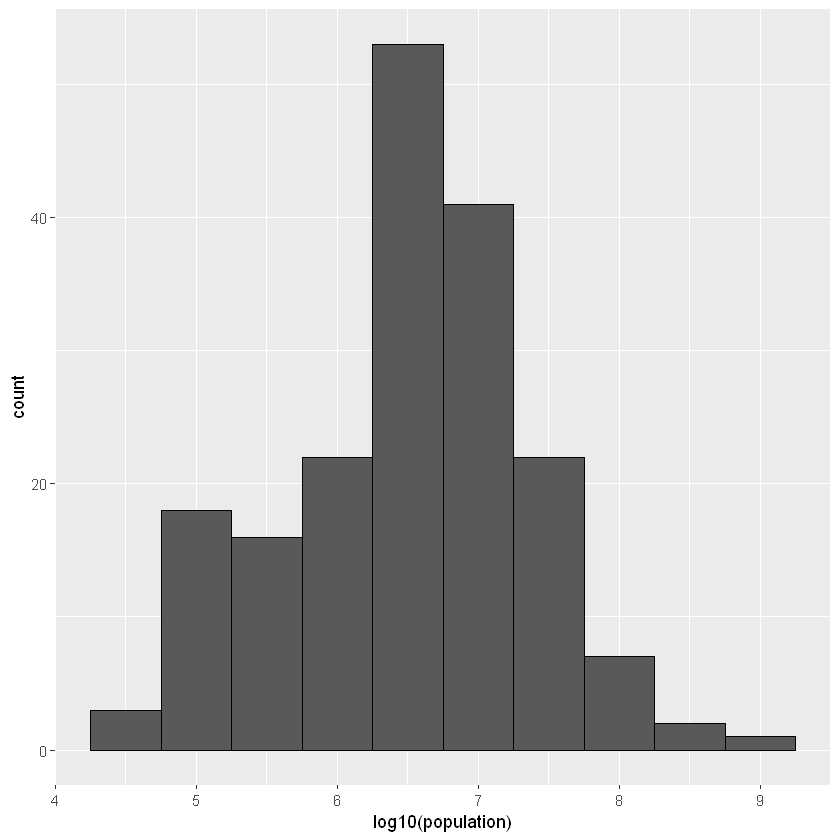

In [43]:
gapminder %>% 
  filter(year == past_year) %>%
  ggplot(aes(log10(population))) +
  geom_histogram(binwidth = 0.5, color = "black")

In [44]:
# n the above, we quickly see that country populations range between ten thousand and ten billion

In [46]:
# the advantage of showing logged scales is that the original values are displayed in the plot, which are easier to interpret
# if we want to scale the axis with logs, we can use the scale_x_continuous function

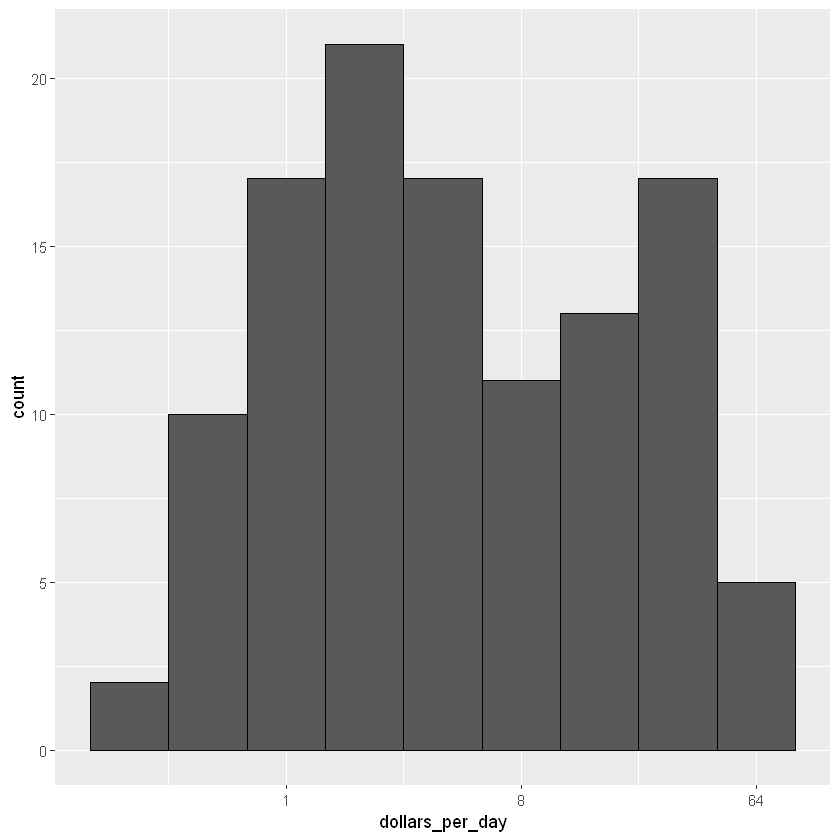

In [47]:
gapminder %>% 
  filter(year == past_year & !is.na(gdp)) %>%
  ggplot(aes(dollars_per_day)) + 
  geom_histogram(binwidth = 1, color = "black") +
  scale_x_continuous(trans = "log2")

In [49]:
# Mutlimodal
#the mode of a distribution is the value with the highest frequency.
#Above graph is bimodal, one at 2 and other at 32

### Comparing multiple distributions with boxplots and ridge plots
`A histogram showed us that the 1970 income distribution values show a dichotomy. However, the histogram does not show us if the two groups of countries are west versus the developing world`

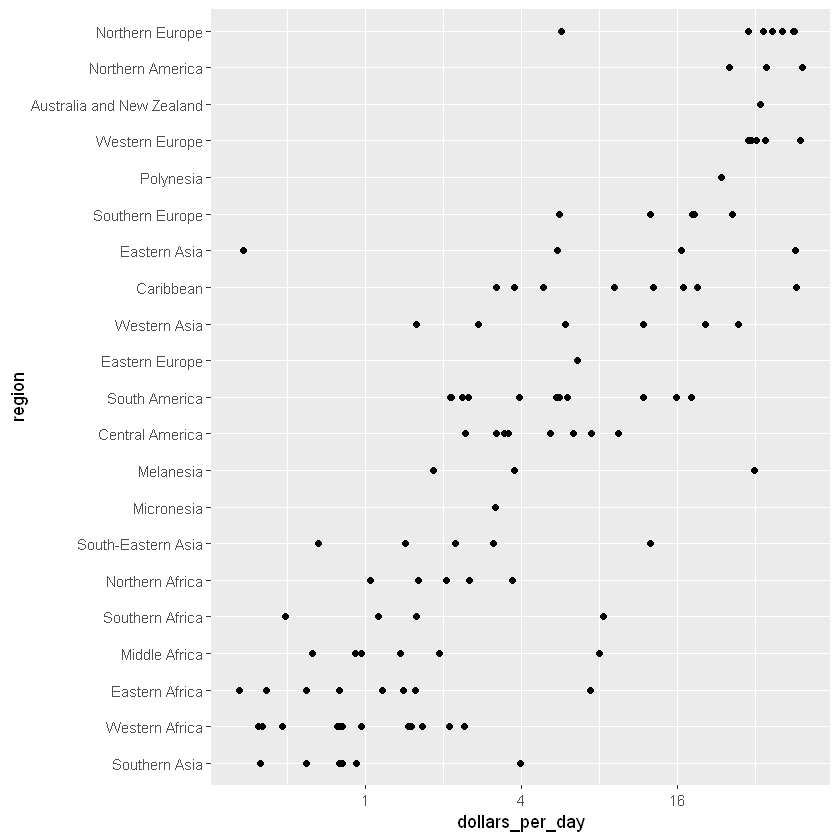

In [55]:
gapminder %>% 
  filter(year == past_year & !is.na(gdp)) %>% # this line is important, removes NA
  mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
  ggplot(aes(dollars_per_day, region)) +
  geom_point() +
  scale_x_continuous(trans = "log2")  

In [75]:
# We can already see that there is indeed a “west versus the rest” dichotomy:

In [76]:
#defining new group
gapminder <- gapminder %>% 
  mutate(group = case_when(
    region %in% c("Western Europe", "Northern Europe","Southern Europe", 
                    "Northern America", 
                  "Australia and New Zealand") ~ "West",
    region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
    region %in% c("Caribbean", "Central America", 
                  "South America") ~ "Latin America",
    continent == "Africa" & 
      region != "Northern Africa" ~ "Sub-Saharan",
    TRUE ~ "Others"))

In [78]:
# turn this group variable into a factor to control the order of the levels
gapminder <- gapminder %>% 
  mutate(group = factor(group, levels = c("Others", "Latin America", 
                                          "East Asia", "Sub-Saharan",
                                          "West")))

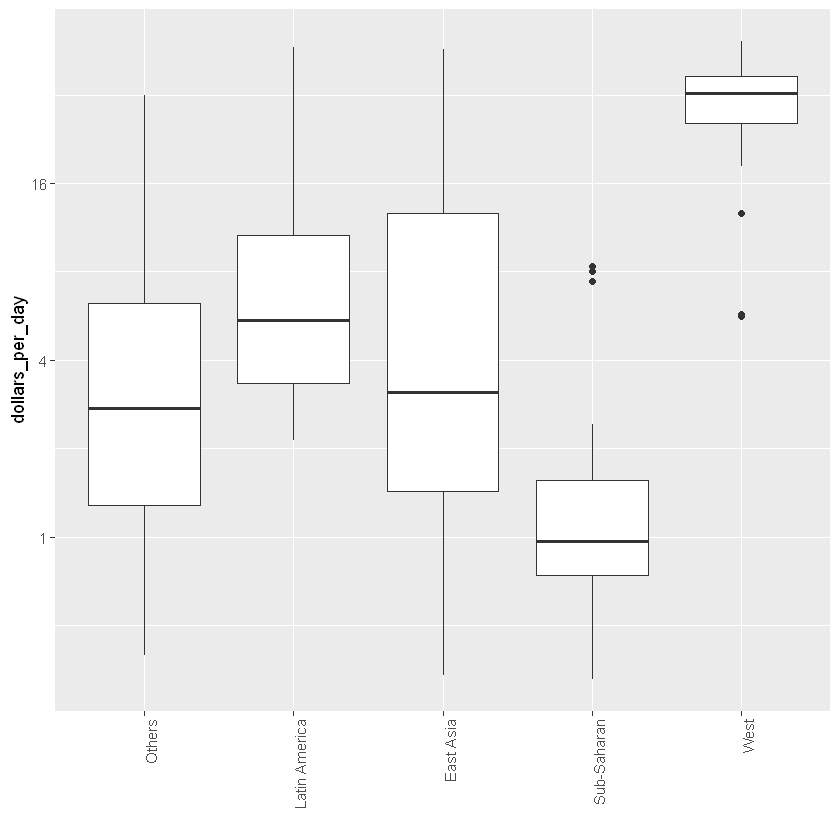

In [79]:
# boxplot
p <- gapminder %>% 
  filter(year == past_year & !is.na(gdp)) %>%
  ggplot(aes(group, dollars_per_day)) +
  geom_boxplot() +
  scale_y_continuous(trans = "log2") +
  xlab("") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
p

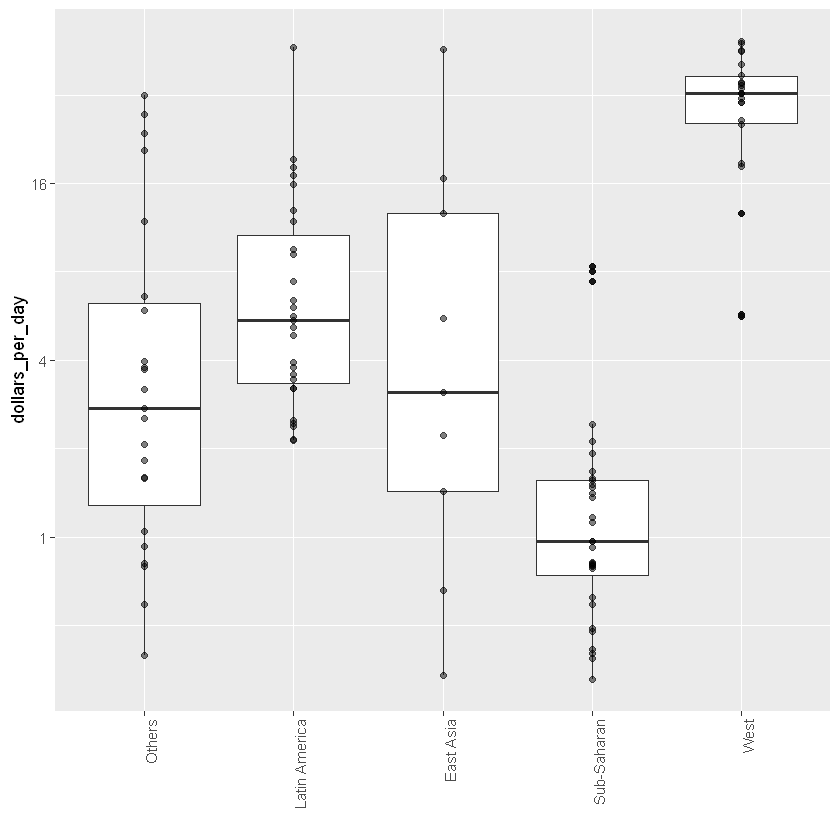

In [81]:
p + geom_point(alpha = 0.5) # showing all those points

In [86]:
# In cases in which we are concerned that the boxplot summary is too simplistic,
# we can show stacked smooth densities or histograms
# We refer to these as ridge plots. Because we are used to visualizing densities with values in the x-axis,
# we stack them vertically
#  For example, boxplots will not permit us to discover bimodal distributions
# ggridges is used for overlaying density plots

Installing package into 'C:/Users/solanjx/OneDrive - AbbVie Inc (O365)/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggridges' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\solanjx\AppData\Local\Temp\RtmpEd7bLk\downloaded_packages


Warning message:
"package 'ggridges' was built under R version 3.6.3"Picking joint bandwidth of 0.648


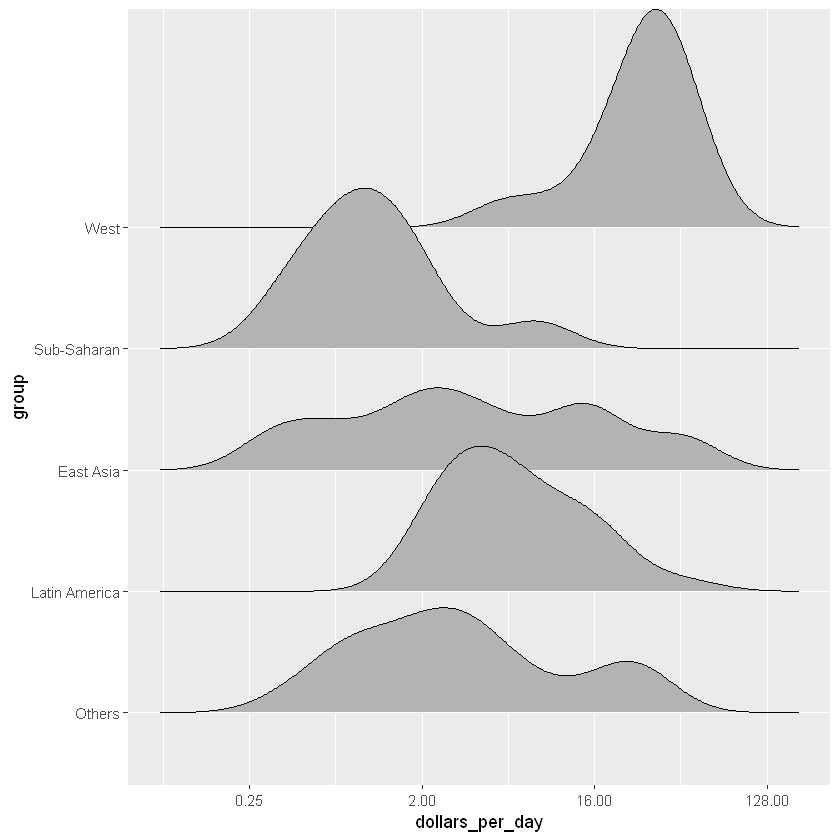

In [88]:
# install.packages('ggridges')
library(ggridges)
p <- gapminder %>% 
  filter(year == past_year & !is.na(dollars_per_day)) %>%
  ggplot(aes(dollars_per_day, group)) + 
  scale_x_continuous(trans = "log2") 
p  + geom_density_ridges() 

Picking joint bandwidth of 0.648


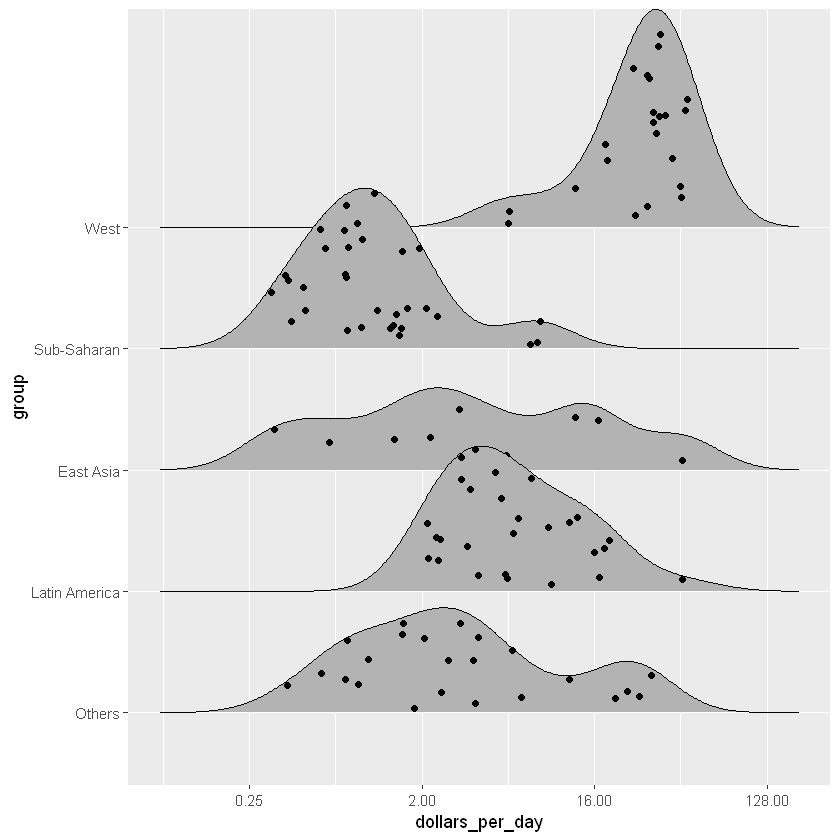

In [89]:
# showing the points
p + geom_density_ridges(jittered_points = TRUE)

Picking joint bandwidth of 0.648


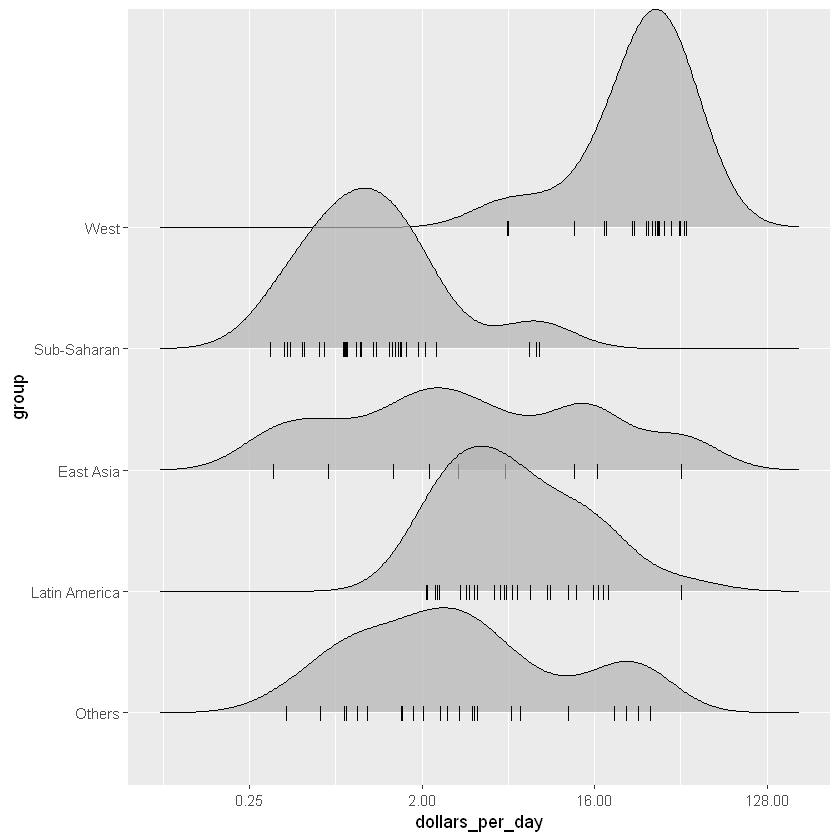

In [90]:
# another way
p + geom_density_ridges(jittered_points = TRUE, 
                        position = position_points_jitter(height = 0),
                        point_shape = '|', point_size = 3, 
                        point_alpha = 1, alpha = 0.7)

In [91]:
# 1970 versus 2010 income distributions using facets

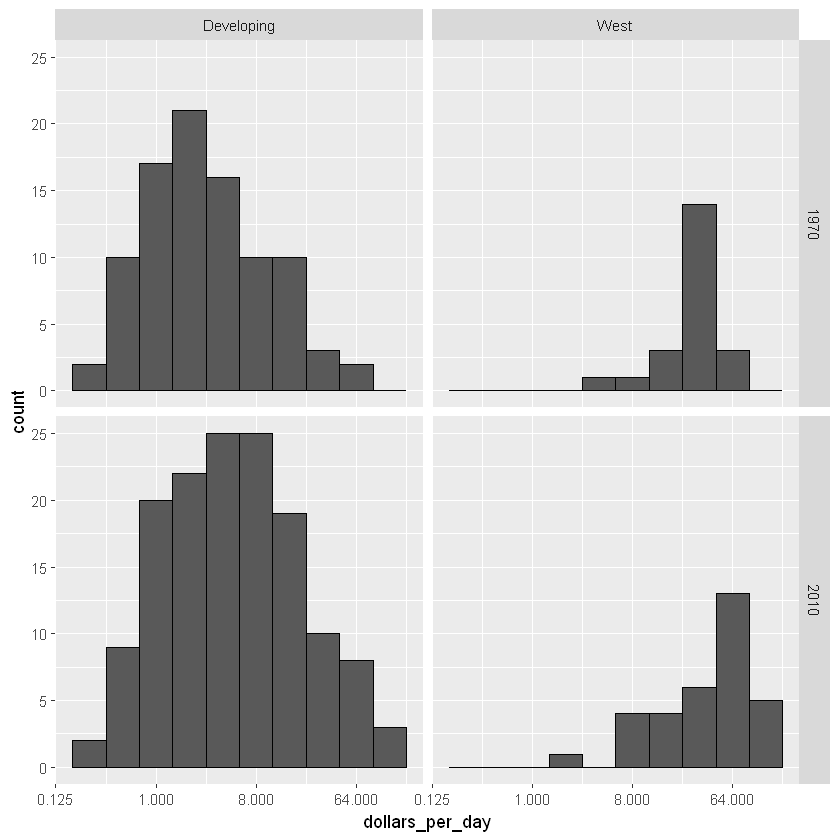

In [93]:
past_year <- 1970
present_year <- 2010
years <- c(past_year, present_year)
gapminder %>% 
  filter(year %in% years & !is.na(gdp)) %>%
  mutate(west = ifelse(group == "West", "West", "Developing")) %>% # LAME LOL
  ggplot(aes(dollars_per_day)) +
  geom_histogram(binwidth = 1, color = "black") +
  scale_x_continuous(trans = "log2") + 
  facet_grid(year ~ west)

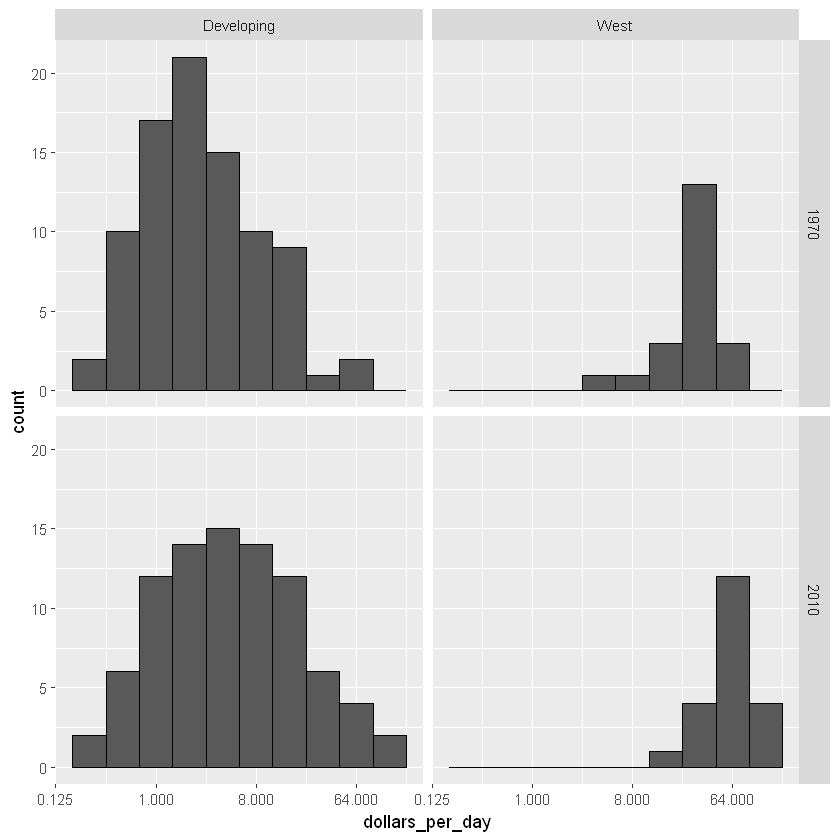

In [95]:
# however new countries have been added in 2010, so to compare using same set of countries, belonging in 1970:
# We remake the plots using only countries with data available for both years
country_list_1 <- gapminder %>% 
  filter(year == past_year & !is.na(dollars_per_day)) %>% 
  pull(country)

country_list_2 <- gapminder %>% 
  filter(year == present_year & !is.na(dollars_per_day)) %>% 
  pull(country)
      
country_list <- intersect(country_list_1, country_list_2)

past_year <- 1970
present_year <- 2010
years <- c(past_year, present_year)
gapminder %>% 
  filter(year %in% years & !is.na(gdp) & country %in% country_list) %>%
  mutate(west = ifelse(group == "West", "West", "Developing")) %>% # LAME LOL
  ggplot(aes(dollars_per_day)) +
  geom_histogram(binwidth = 1, color = "black") +
  scale_x_continuous(trans = "log2") + 
  facet_grid(year ~ west)

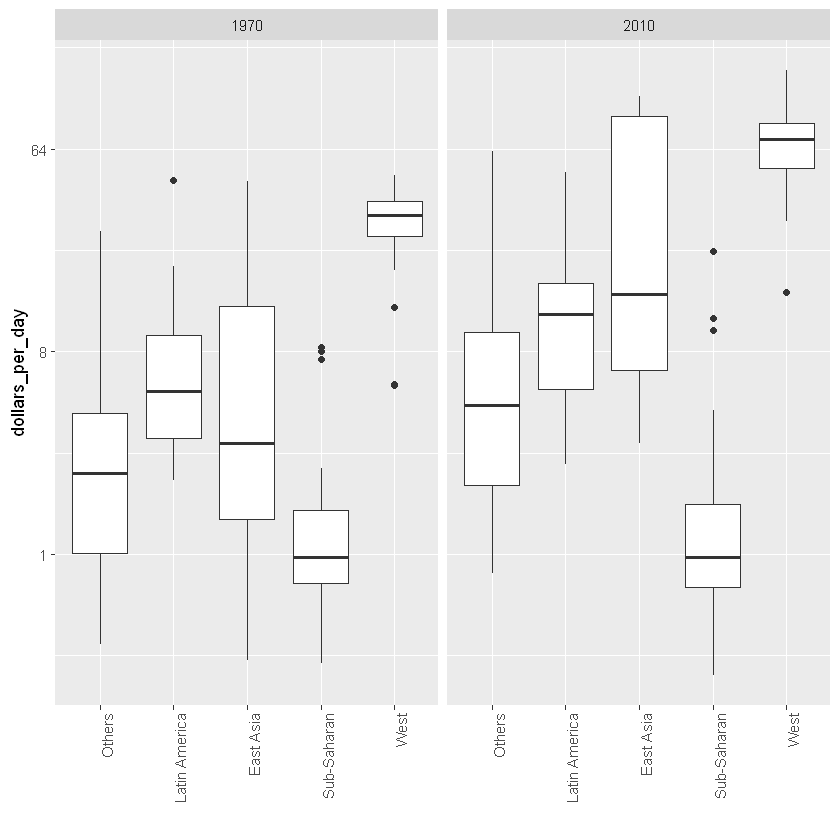

In [96]:
gapminder %>% 
  filter(year %in% years & country %in% country_list) %>%
  ggplot(aes(group, dollars_per_day)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_y_continuous(trans = "log2") +
  xlab("") +
  facet_grid(. ~ year)

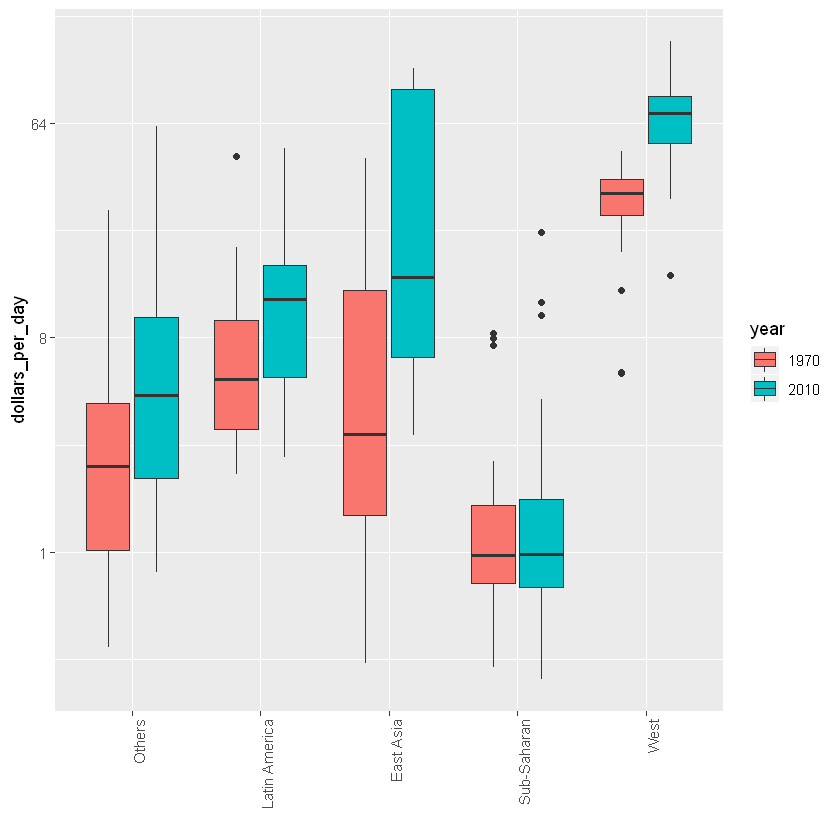

In [99]:
gapminder %>% 
  filter(year %in% years & country %in% country_list) %>%
  mutate(year = factor(year)) %>%
  ggplot(aes(group, dollars_per_day, fill = year)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_y_continuous(trans = "log2") +
  xlab("") 

In [100]:
# Finally, we point out that if what we are most interested in is comparing before and after values, 
# it might make more sense to plot the percentage increases

In [101]:
# Let’s start by noting that density plots for income distribution in 1970 and 2010 deliver the message that the gap is closing

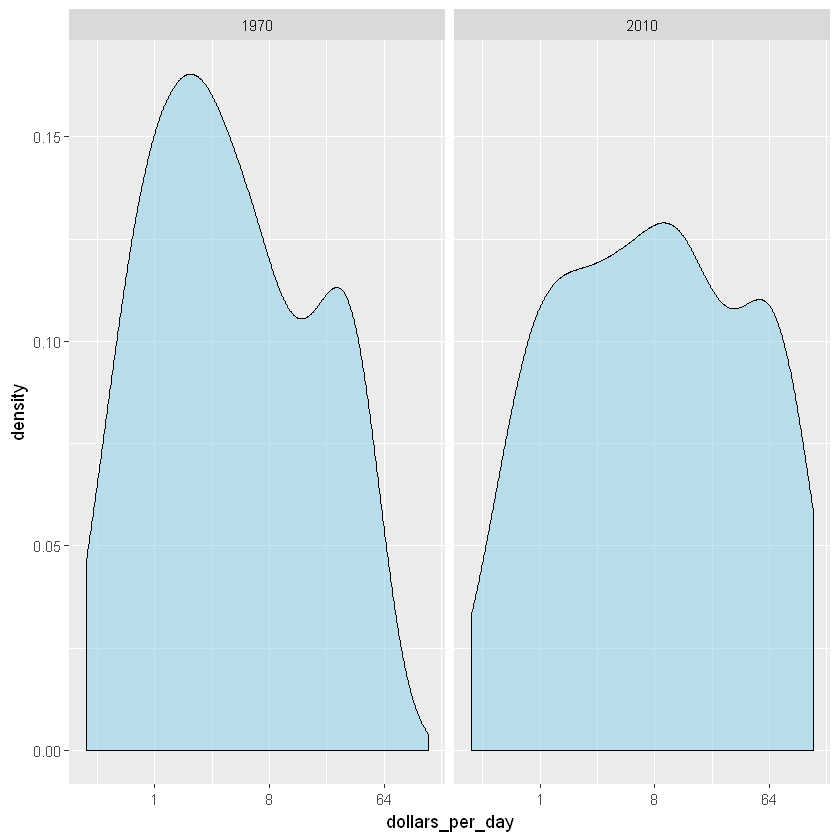

In [108]:
gapminder %>% 
  filter(year %in% years & country %in% country_list) %>%
  ggplot(aes(dollars_per_day)) +
  geom_density(fill = "skyblue", alpha=0.5) + 
  scale_x_continuous(trans = "log2") + 
  facet_grid(. ~ year)

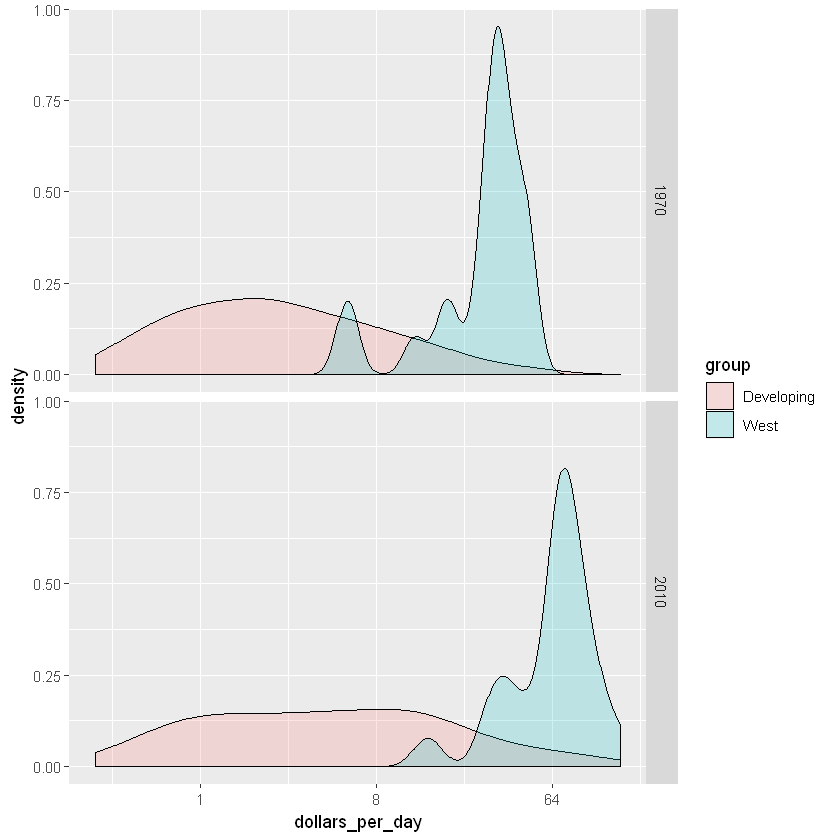

In [112]:
#The next message we need to convey is that the reason for this change in distribution is 
# that several poor countries became richer, rather than some rich countries becoming poorer. 
# To do this, we can assign a color to the groups we identified during data exploration.
# we first need to learn how to make these smooth densities in a way 
# that preserves information on the number of countries in each group, developing and west are different 
# in total number of countries
# we need computed variables with geom_density
# in below graphics plot doesnt show the weightage of country counts for both groups
gapminder %>% 
  filter(year %in% years & country %in% country_list) %>%
  mutate(group = ifelse(group == "West", "West", "Developing")) %>%
  ggplot(aes(dollars_per_day, fill = group)) +
  scale_x_continuous(trans = "log2") +
  geom_density(alpha = 0.2) + 
  facet_grid(year ~ .)

In [116]:
# To have the areas of these densities be proportional to the size of the groups,
# we can simply multiply the y-axis values by the size of the group
# From the geom_density help file, we see that the functions compute a variable called count that does exactly this
# In ggplot2, we access these variables by surrounding the name with two dots

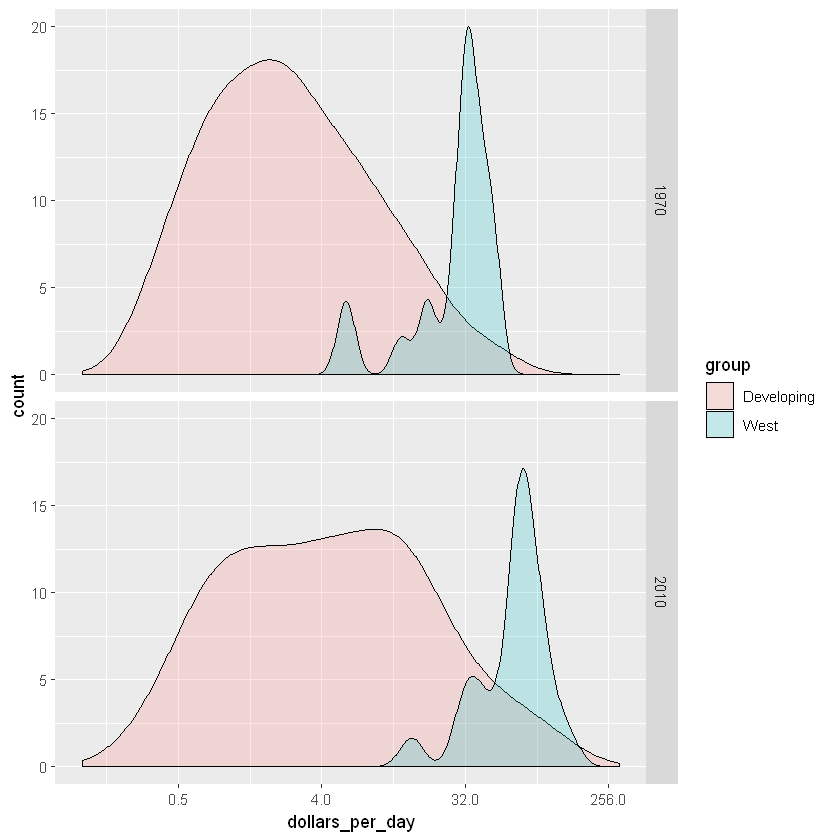

In [114]:
p <- gapminder %>% 
  filter(year %in% years & country %in% country_list) %>%
  mutate(group = ifelse(group == "West", "West", "Developing")) %>%
  ggplot(aes(dollars_per_day, y = ..count.., fill = group)) +
  scale_x_continuous(trans = "log2", limit = c(0.125, 300))

p + geom_density(alpha = 0.2) + 
  facet_grid(year ~ .)

Warning message:
"Ignoring unknown parameters: adjust"Picking joint bandwidth of 0.648
Picking joint bandwidth of 0.726


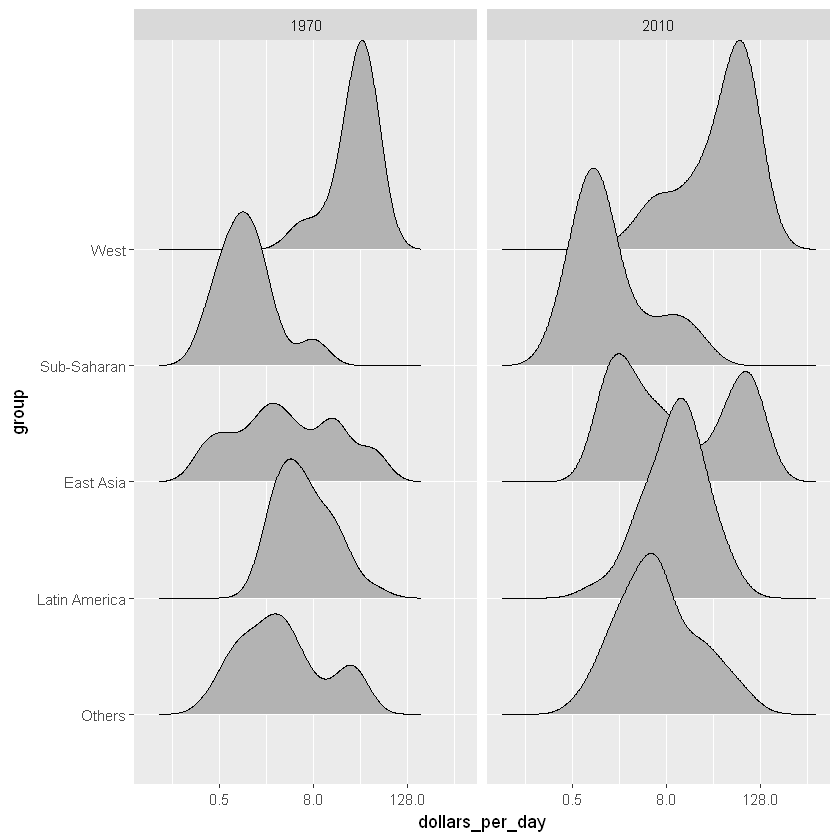

In [117]:
#ridge plot
gapminder %>% 
  filter(year %in% years & !is.na(dollars_per_day)) %>%
  ggplot(aes(dollars_per_day, group)) + 
  scale_x_continuous(trans = "log2") + 
  geom_density_ridges(adjust = 1.5) +
  facet_grid(. ~ year)

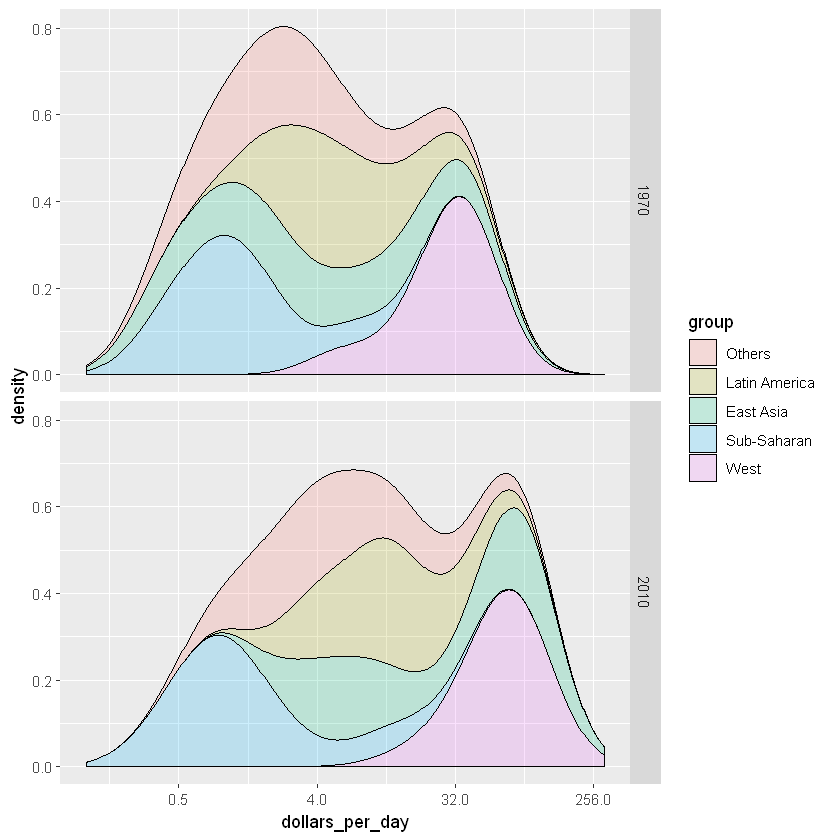

In [123]:
# stacking
gapminder %>% 
    filter(year %in% years & country %in% country_list) %>%
  group_by(year) %>%
  mutate(weight = population/sum(population)*2) %>%
  ungroup() %>%
  ggplot(aes(dollars_per_day, fill = group)) +
  scale_x_continuous(trans = "log2", limit = c(0.125, 300)) + 
  geom_density(alpha = 0.2, bw = 0.75, position = "stack") + 
  facet_grid(year ~ .) 

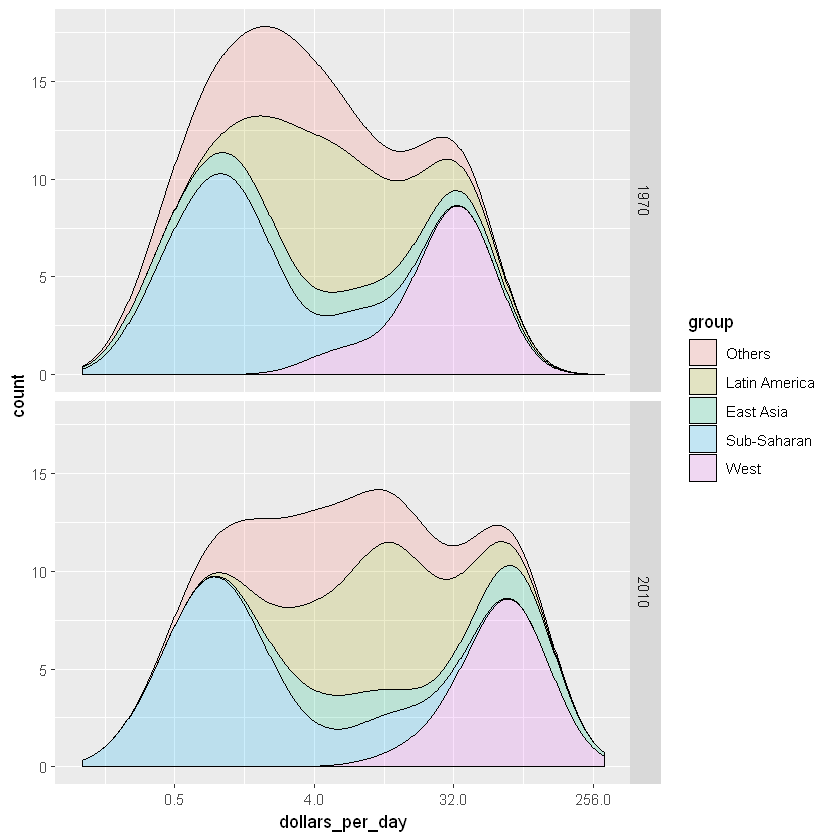

In [124]:
# stcking in proportion, using count
# stacking
gapminder %>% 
    filter(year %in% years & country %in% country_list) %>%
  group_by(year) %>%
  mutate(weight = population/sum(population)*2) %>%
  ungroup() %>%
  ggplot(aes(dollars_per_day, y = ..count.., fill = group)) +
  scale_x_continuous(trans = "log2", limit = c(0.125, 300)) + 
  geom_density(alpha = 0.2, bw = 0.75, position = "stack") + 
  facet_grid(year ~ .) 

In [125]:
# we note that these distributions weigh every country the same. So if most of the population is improving,
# but living in a very large country, such as China, we might not appreciate this

Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not ge

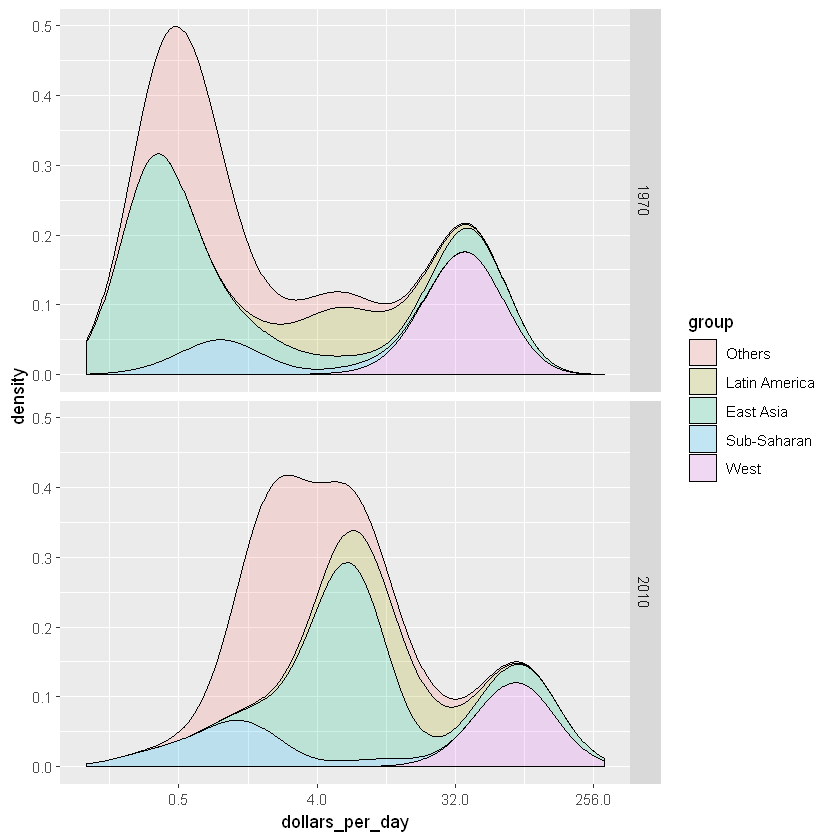

In [135]:
gapminder %>% 
    filter(year %in% years & country %in% country_list) %>%
  group_by(year) %>%
  mutate(weight = population/sum(population)*2) %>%
  ungroup() %>%
  ggplot(aes(dollars_per_day, fill = group)) +
  scale_x_continuous(trans = "log2", limit = c(0.125, 300)) + 
  geom_density(alpha = 0.2, bw = 0.75, position = "stack", aes(weight=weight)) + 
  facet_grid(year ~ .) 